# Baselines

## Motivation

Create a set of baselines for demand prediction using conventional methods:

* time series prediction
* per cell prediction using any type of regressor, e.g. gradient boosting regressor

**TODO**
- define a small area 10x10 squares
- explore demand over time changes - how small time prediction intervals should be

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [61]:
data = pd.read_feather('../data/train_sample.feather')

data.head(3)

,pickup_datetime,dropoff_datetime,passenger_count,distance,pickup_lon,pickup_lat,dropoff_lon,dropoff_lat
0,2015-01-01 00:00:00,2015-01-01 00:00:00,3,2.510570,-74.001320,40.729057,-74.010208,40.719662
1,2015-01-01 00:00:03,2015-01-01 00:10:50,1,2.542757,-73.987579,40.765270,-73.976921,40.776970
2,2015-01-01 00:00:03,2015-01-01 00:21:48,2,4.136004,-73.969017,40.754269,-73.994133,40.761600


Create a grid and count the *number of requests per cell*

## Select a small area

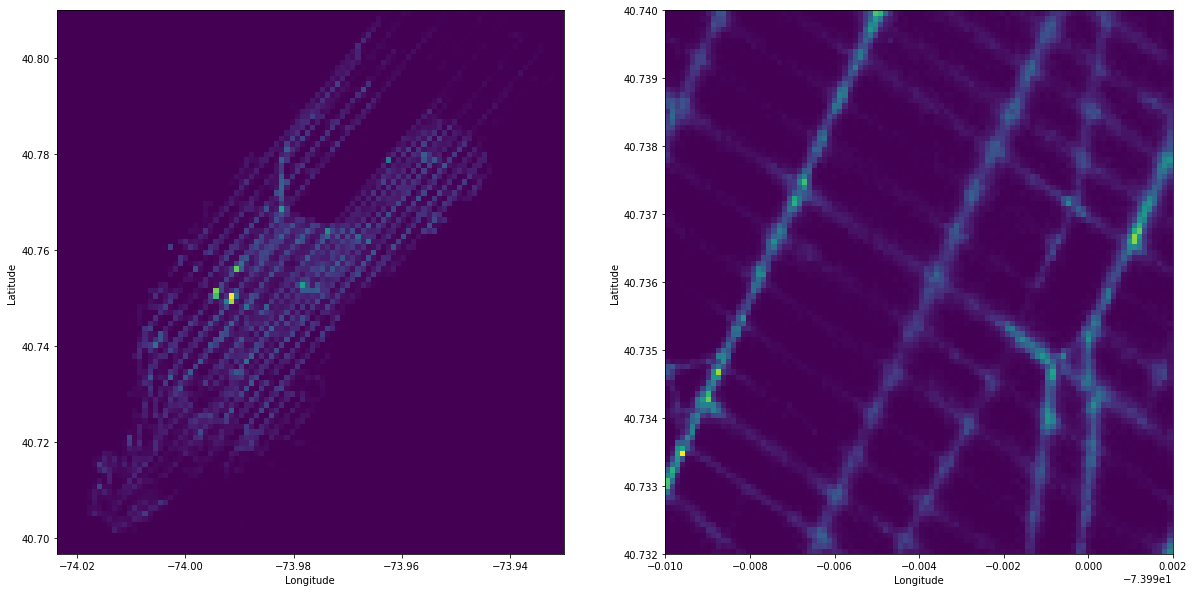

In [95]:
plt.figure(figsize=(20, 10))

bounding_box = ((-74.0238, -73.93), (40.6967, 40.81))
sample_box = ((-74.00, -73.988), (40.732, 40.74))

bins = (100, 100)

for i, box in enumerate([bounding_box, sample_box]):
    plt.subplot(1, 2, i + 1)

    plt.hist2d(
        data.pickup_lon,
        data.pickup_lat,
        range=box, bins=bins)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

## Number of requests per cell

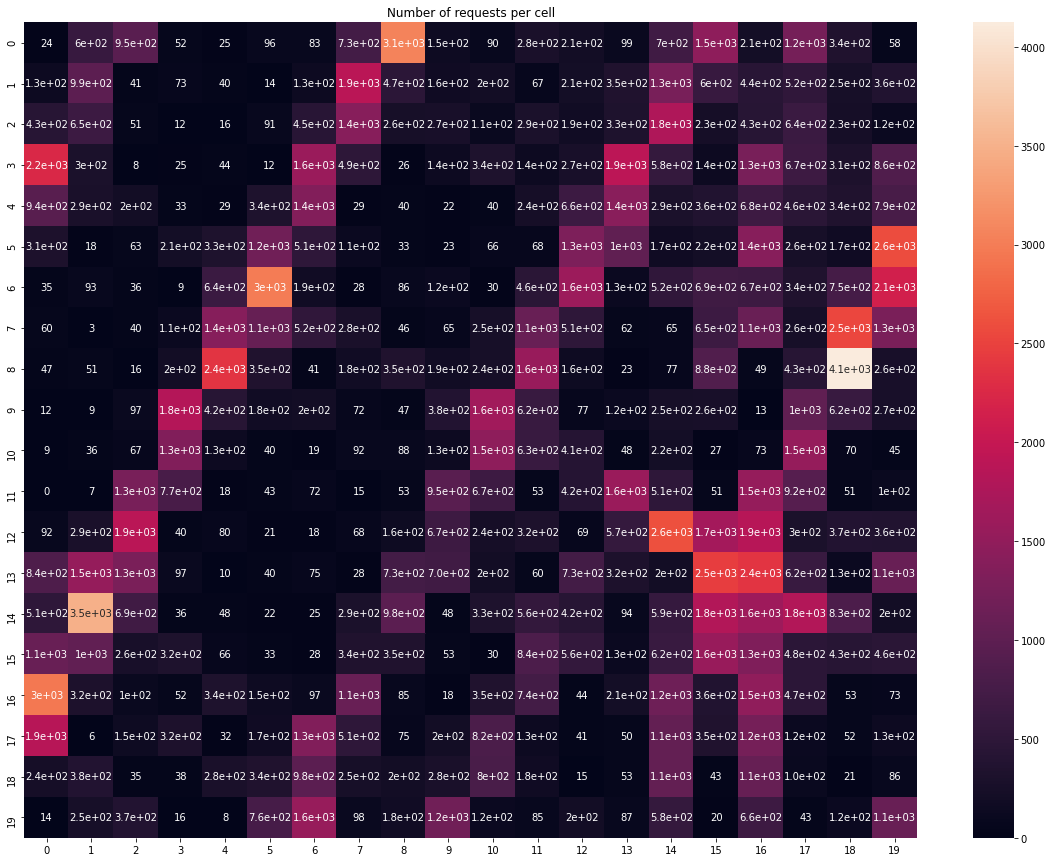

In [115]:
plt.figure(figsize=(20, 15))

bins = (20, 20)

hist, _, _ = np.histogram2d(
    data.pickup_lon,
    data.pickup_lat,
    range=sample_box, bins=bins)

plt.title('Number of requests per cell')
sns.heatmap(np.flip(np.fliplr(hist.T)), annot=True);